In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Normality of Mean from Non-Normal Data

We cannot reject the null hypothesis that the means are normally distributed: p = 0.48701863278767465
We cannot reject the null hypothesis that the means are normally distributed: p = 0.10586041614843006
We cannot reject the null hypothesis that the means are normally distributed: p = 0.9496192049019836
We cannot reject the null hypothesis that the means are normally distributed: p = 0.20088810530268053


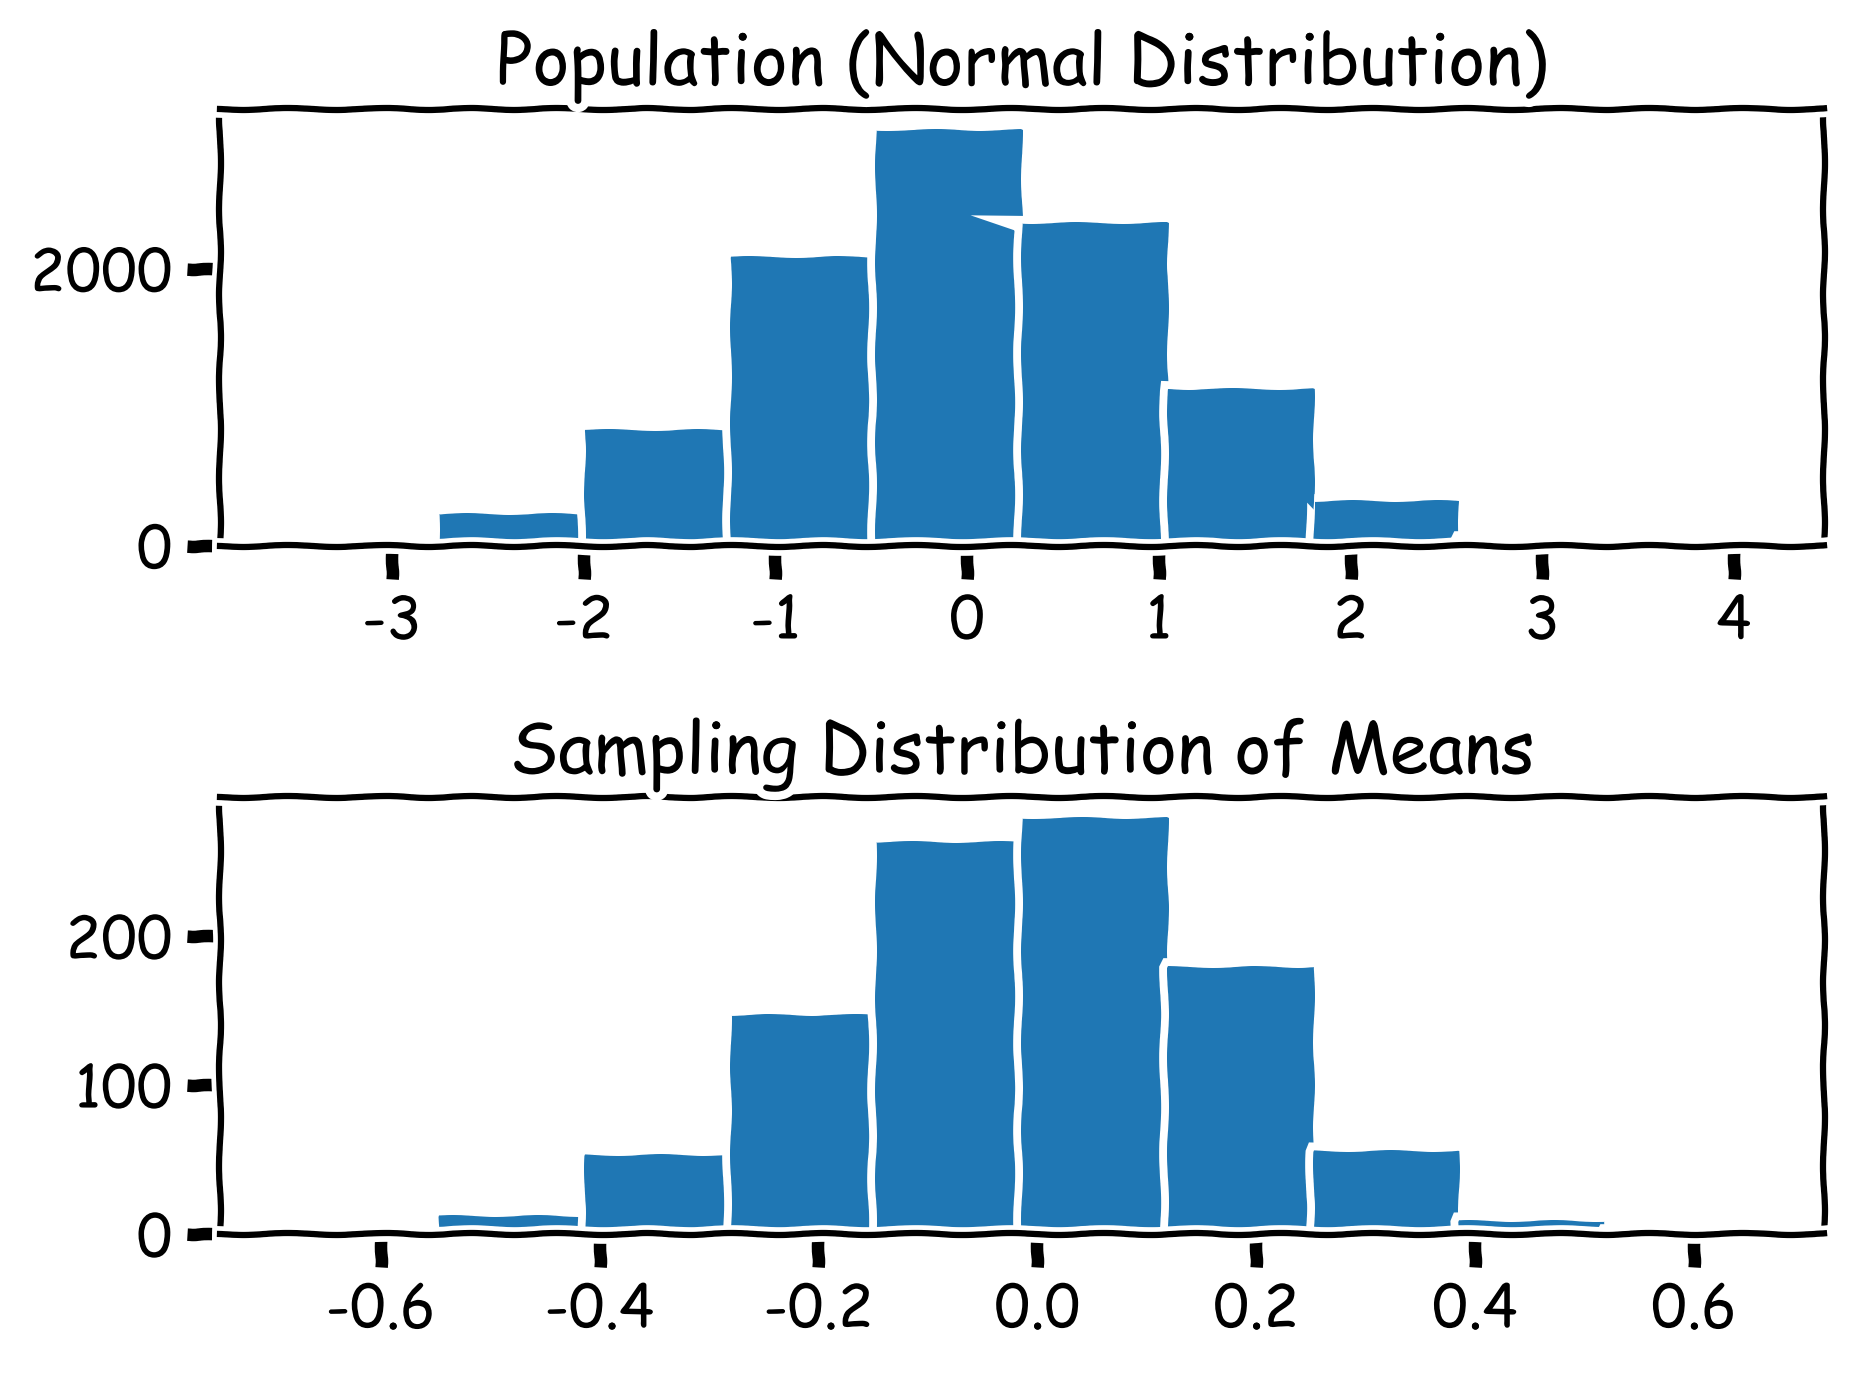

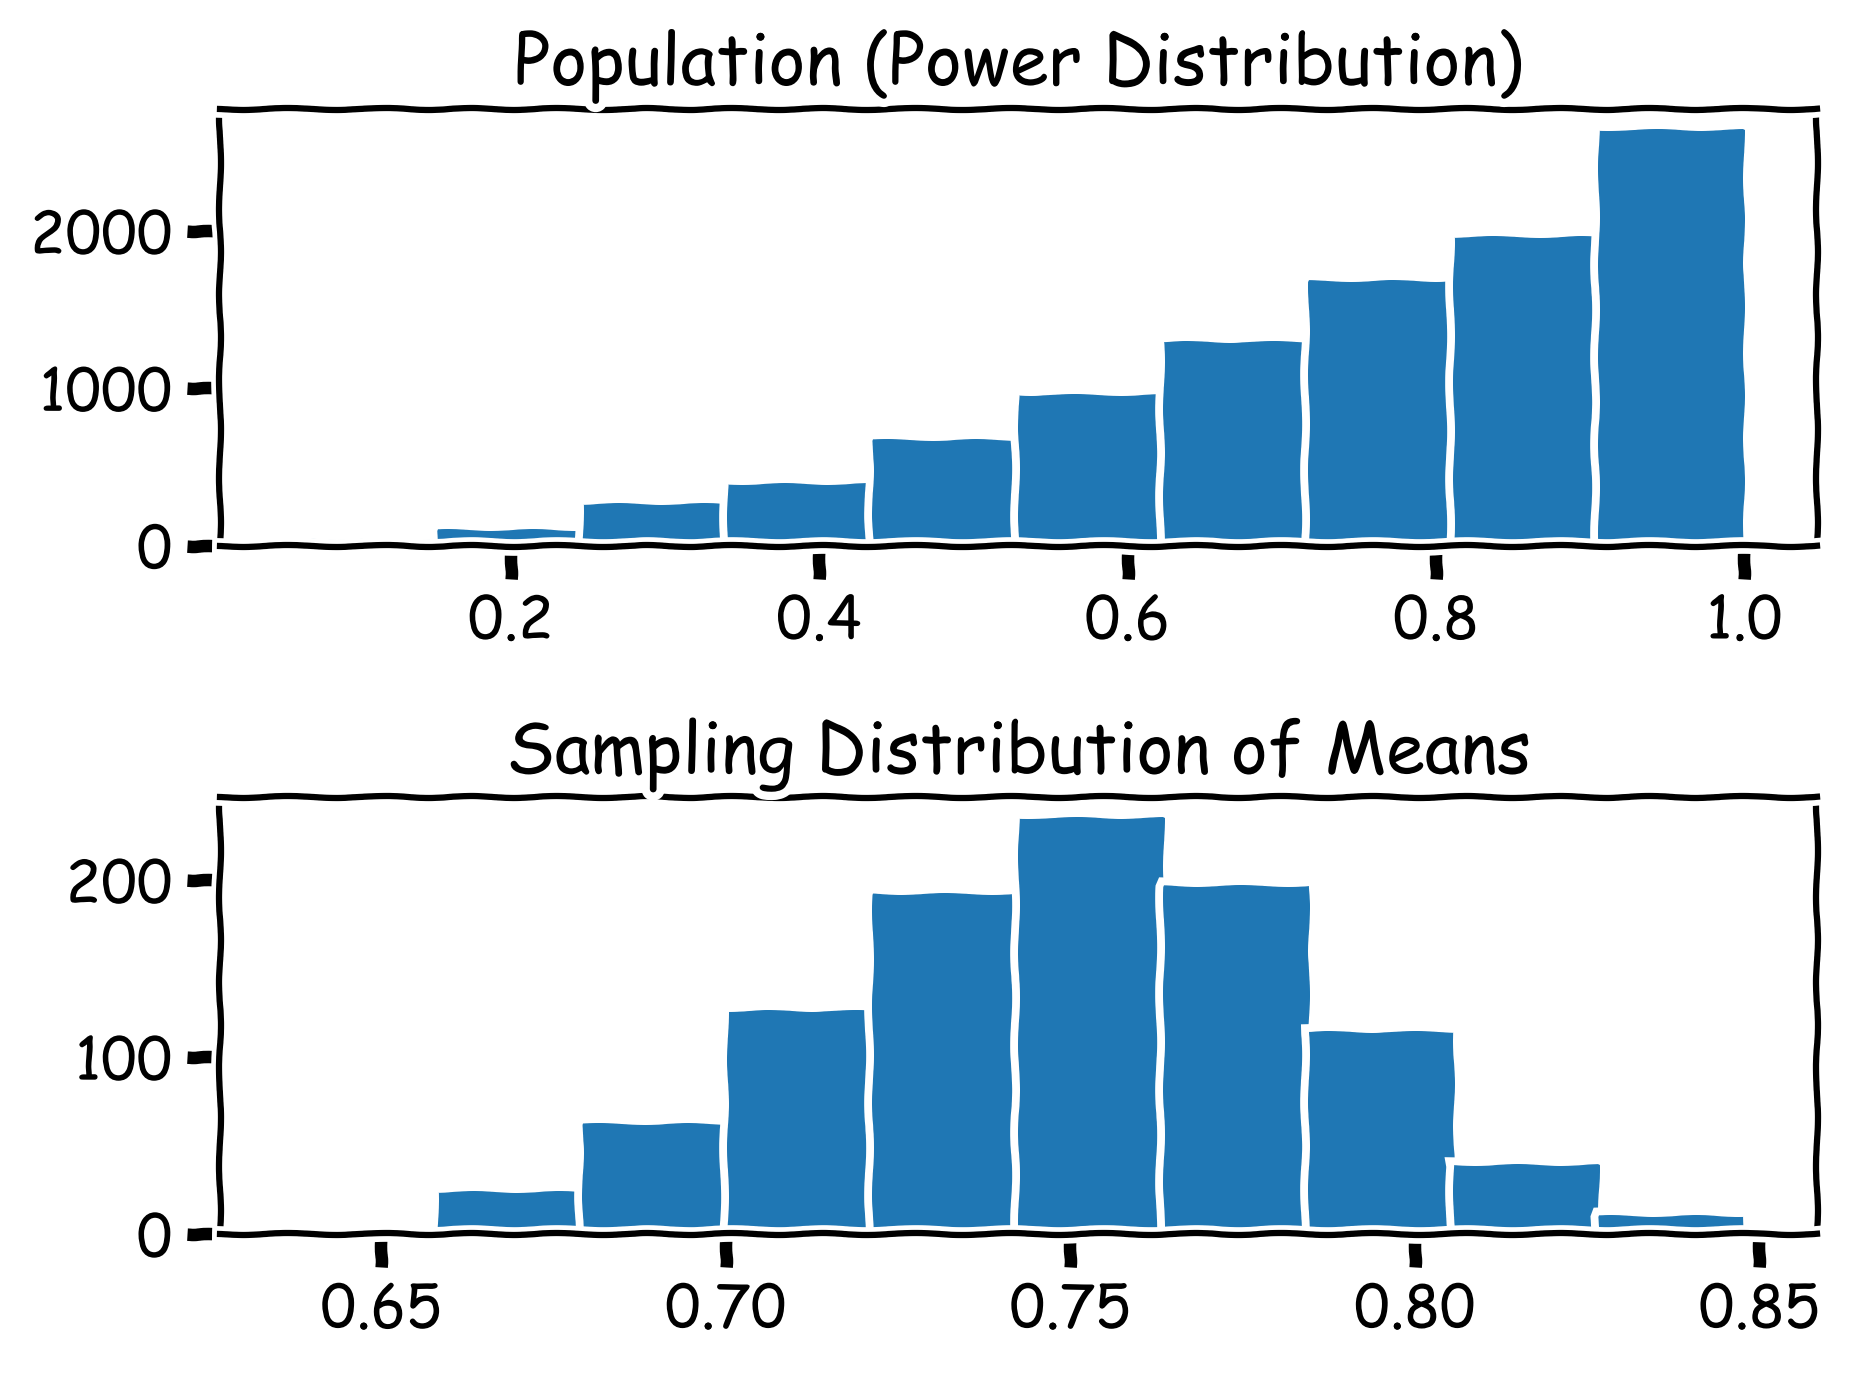

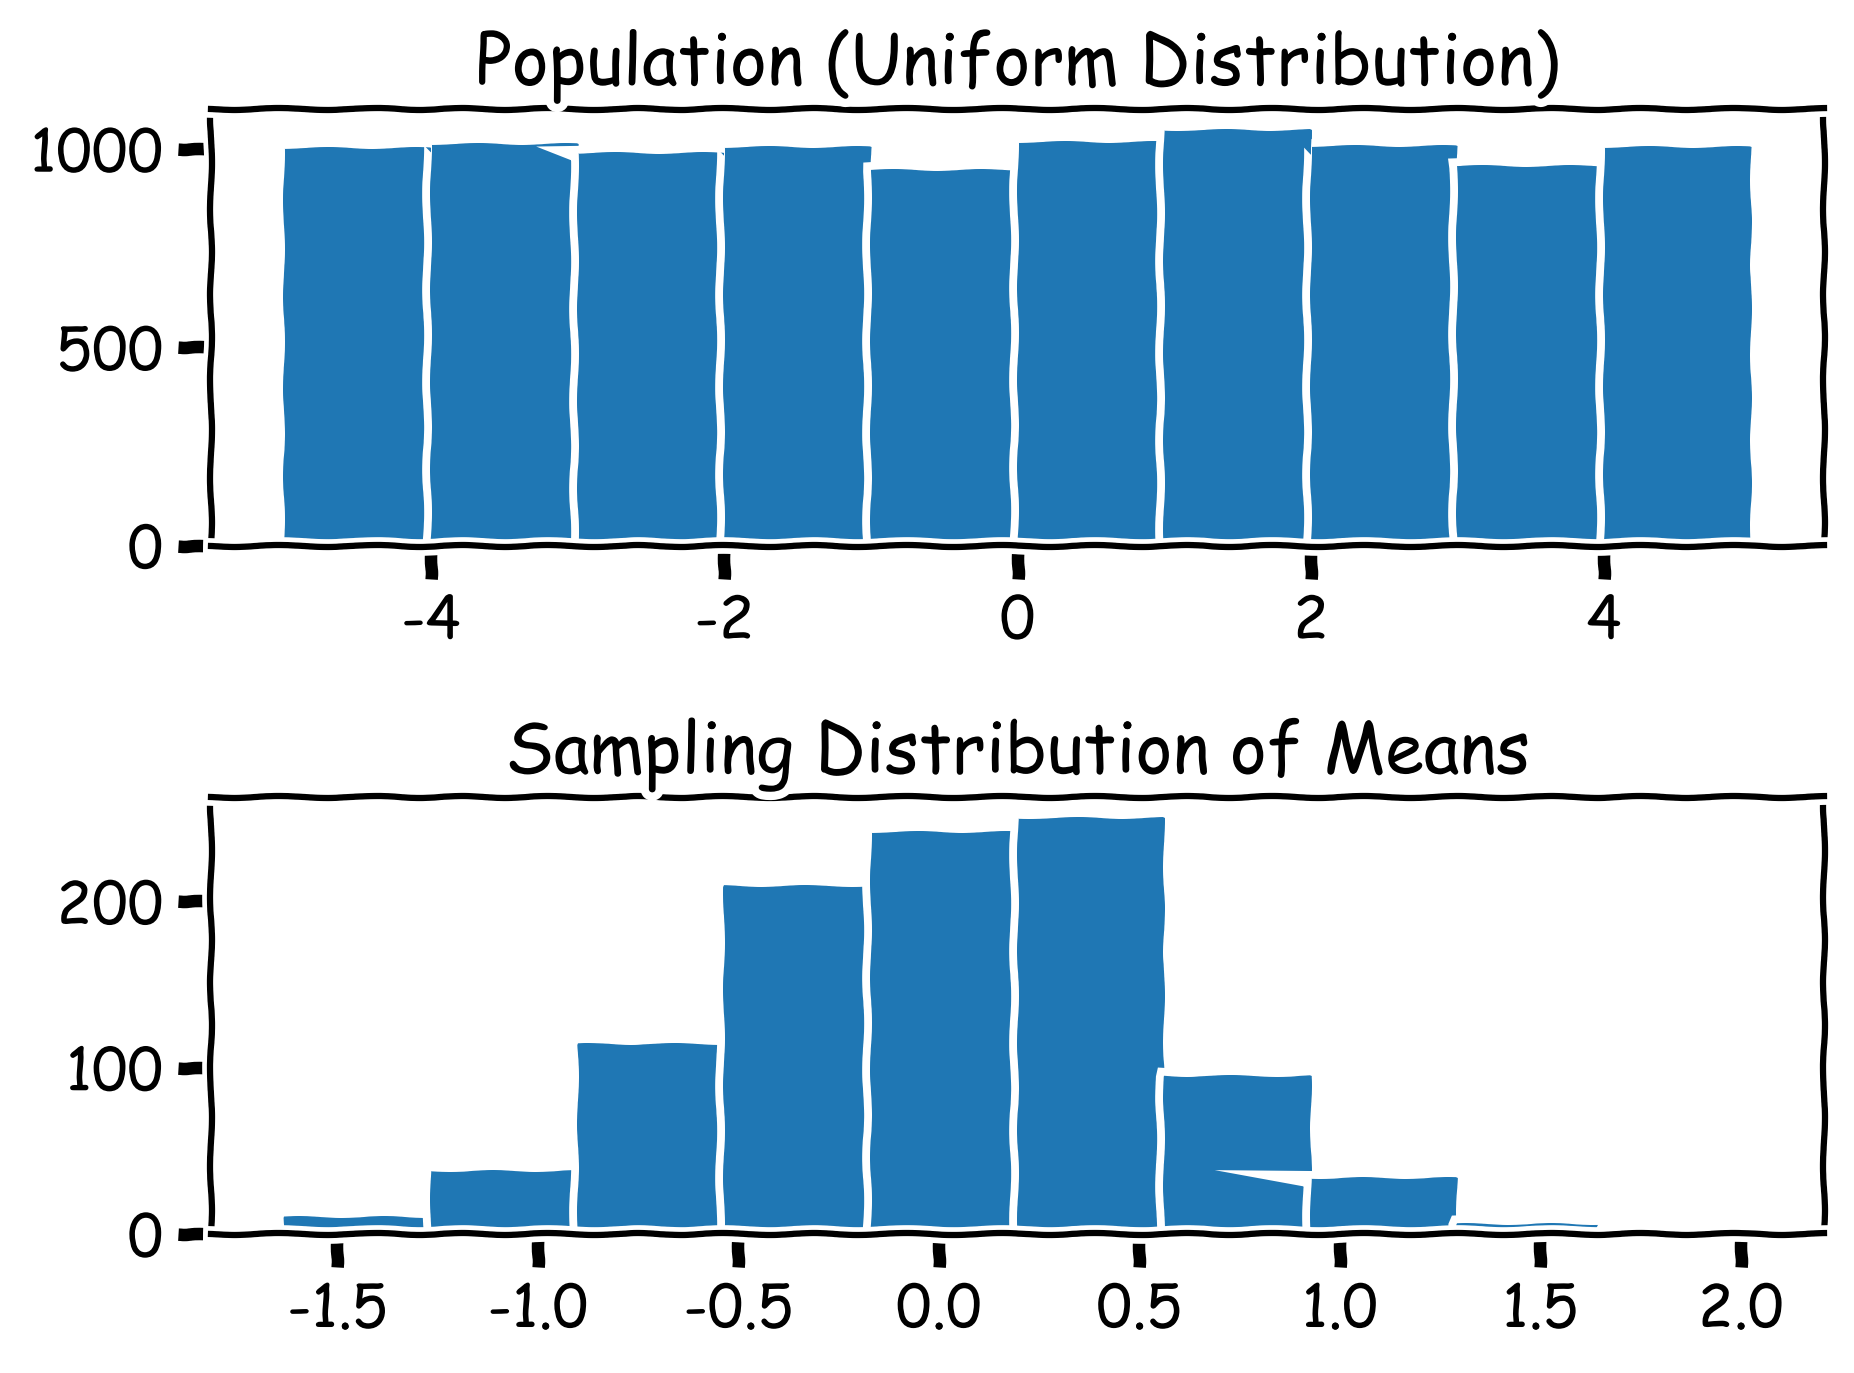

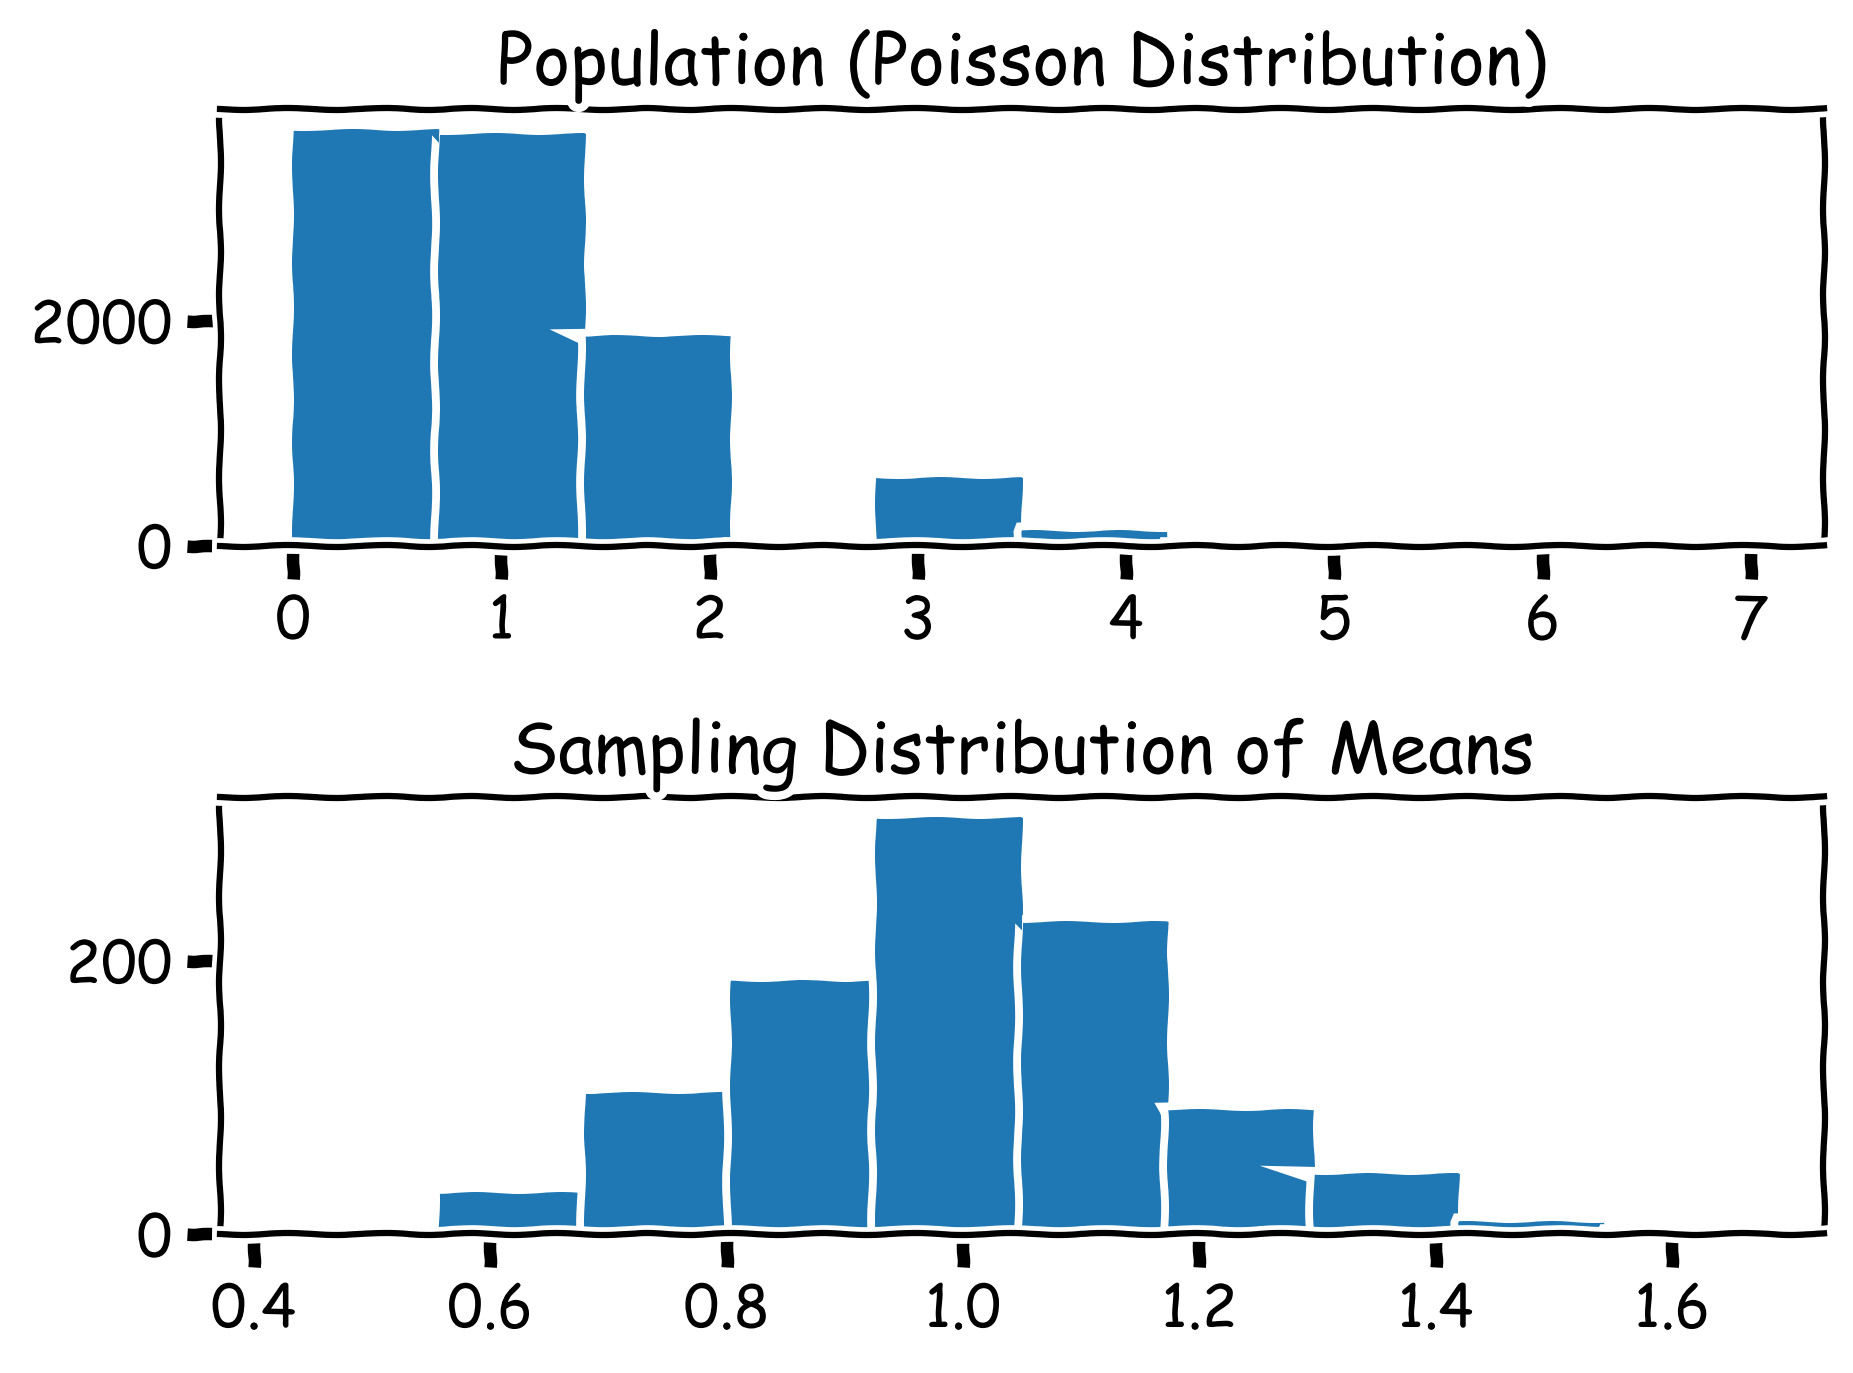

In [20]:
num_samples = 30
times_sampled = 1000

population_size = 10000

plt.xkcd()

for underlying_distribution in ['Normal', 'Power', 'Uniform', 'Poisson']:
    
    # arbitrarily-chosen parameter for each family of distributions
    if underlying_distribution == 'Normal':
        population = np.random.normal(0, 1, population_size)
    elif underlying_distribution == 'Power':
        population = np.random.power(3, population_size)
    elif underlying_distribution == 'Uniform':
        population = np.random.uniform(-5, 5, population_size)
    elif underlying_distribution == 'Poisson':
        population = np.random.poisson(1, population_size)
    else:
        break

    means = np.zeros(times_sampled)

    for i in range(times_sampled):
        sample_instance = np.random.choice(population, num_samples, replace=False)
        means[i] = np.mean(sample_instance)

    plt.figure(dpi=300, figsize=[6.4,4.8])
    plt.subplot(2,1,1)
    plt.hist(population)
    plt.title(f"Population ({underlying_distribution} Distribution)")
    plt.subplot(2,1,2)
    plt.hist(means)
    plt.title("Sampling Distribution of Means")
    plt.tight_layout()
    plt.savefig("../images/lecture02/" + underlying_distribution.lower() + "_distribution.png")

    k2, p = stats.normaltest(means)
    if p > 0.05:
        print(f"We cannot reject the null hypothesis that the means are normally distributed: p = {p}")
    else:
        print(f"We can reject the null hypothesis that the means are normally distributed: p = {p}")

## Multiple Comparisons

In [4]:
alpha_1 = 0.05
alpha_2 = 0.01
n = np.arange(1,26)
risk_1 = 1-(1-alpha_1)**n
risk_2 = 1-(1-alpha_2)**n
risk_1_bonf = 1-(1-alpha_1/n)**n
risk_2_bonf = 1-(1-alpha_2/n)**n

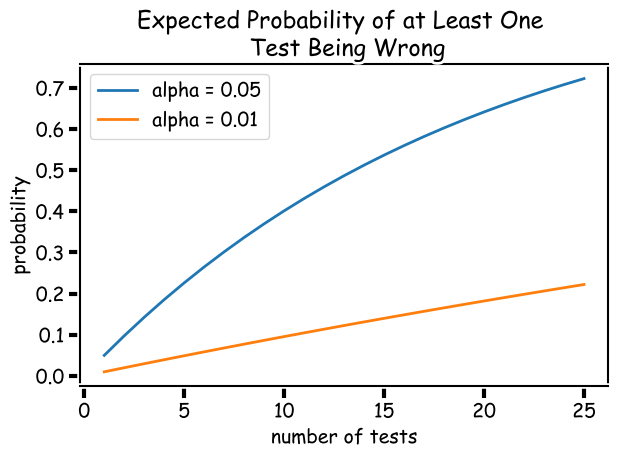

In [18]:
plt.xkcd(False)

plt.figure()
plt.plot(n,risk_1)
plt.plot(n,risk_2)
plt.legend(["alpha = 0.05", "alpha = 0.01"])
plt.xlabel("number of tests")
plt.ylabel("probability")
plt.title("Expected Probability of at Least One \n Test Being Wrong")
plt.tight_layout()
plt.savefig("../images/lecture02/multiple_comparisons_risk.png")


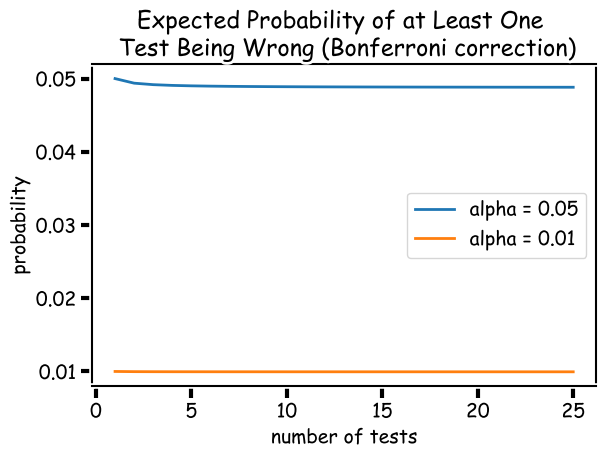

In [19]:
risk_1_bonf = 1-(1-alpha_1/n)**n
risk_2_bonf = 1-(1-alpha_2/n)**n

plt.figure()
plt.plot(n,risk_1_bonf)
plt.plot(n,risk_2_bonf)
plt.legend(["alpha = 0.05", "alpha = 0.01"])
plt.xlabel("number of tests")
plt.ylabel("probability")
plt.title("Expected Probability of at Least One \n Test Being Wrong (Bonferroni correction)")
plt.tight_layout()
plt.grid()
plt.savefig("../images/lecture02/multiple_comparisons_risk_bonferroni.png")
